# FIT 3139 Assignment 2

## Part 1

### Question proposed

How does an isolated 3 species system with a hierarchical food chain survive in nature?

### Model extension

I have selected the **Lotka-Volterra model** to simulate this scenario. Although, the Lotka-Volterra model is usually used for 2 species predator-prey interactions, I have extended it to include a third species. In this scenario, there exists a food chain as follows - 
grass < deer < lion i.e. grass is eaten by a deer and deer is eaten by a lion, however lion does not eat grass.

**The scenario is as follows:**
- Species 1: Grass
- Species 2: Deer (middle predator)
- Species 3: Lion (top predator)

In the model, the grass grows and survives to an extent i.e. up to a certain density after which it stops growing (logistic growth), this grass is eaten by deer which in turn are eaten by lions.

#### Model equations

$$
\begin{aligned}

\frac{dG}{dt} &= \alpha G (1 - \frac{G}{k}) - \beta G D \\
\frac{dD}{dt} &= \gamma G D - \delta D - \epsilon D L \\
\frac{dL}{dt} &= \eta D L - \mu L \\

\end{aligned}

\\

\begin{align*}
\text{where, } \\

& \alpha = \text{growth rate coefficient of the grass} \\
& \beta = \text{death rate coefficient as a result of being grazed} \\
& k = \text{logistic growth coefficient that determines max amount of grass} \\
& \gamma = \text{growth rate from grazing} \\
& \delta = \text{natural death rate} \\
& \epsilon = \text{death rate as a result of being hunted} \\
& \eta = \text{growth rate as a result of hunting prey} \\
& \mu = \text{natural death rate} \\
\end{align*}
$$

In [317]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

## discrete
### Difference equations

In part 1, I described my equations in continuous time. I'm using euler's method to create the system of difference equations to represent them in discrete time.

$$
\begin{align*}

& \text{Let there be any function F(x) such that,} \\
& \frac{dx}{dt} = F(x) \\

& \text{Using Euler's method,} \\
& F(x) = \frac{dx}{dt} \approx \frac{\Delta x}{\Delta t} \approx \frac{x(t + \Delta t) - x(t)}{\Delta t}\\
& F(x) \Delta t = x(t + \Delta t) - x(t) \\
& x(t + \Delta t) = x(t) + F(x) \Delta t \\
\end{align*}
$$

$$

\begin{aligned}
& G_{t+1} = G_t + \left( \alpha G_t \left(1 - \frac{G_t}{k}\right) - \beta G_t D_t \right) \Delta t \\
& D_{t+1} = D_t + \left( \gamma G_t D_t - \delta D_t - \epsilon D_t L_t \right) \Delta t \\
& L_{t+1} = L_t + \left( \eta D_t L_t - \mu L_t \right) \Delta t \\

\end{aligned}
$$

In [318]:
def discrete(G_t, D_t, L_t, alpha, beta, k, gamma, delta, epsilon, eta, mu, t=0, delta_t=0.001, max_iter=1000):
    G_vals = [G_t]
    D_vals = [D_t]
    L_vals = [L_t]
    t_vals = [t]

    for i in range(max_iter):
        G_t_next = G_vals[-1] + ((alpha * G_vals[-1] * (1 - G_vals[-1] / k)) - (beta * G_vals[-1] * D_vals[-1])) * delta_t
        D_t_next = D_vals[-1] + ((gamma * D_vals[-1] * G_vals[-1]) - (delta * D_vals[-1]) - (epsilon * D_vals[-1] * L_vals[-1])) * delta_t
        L_t_next = L_vals[-1] + ((eta * D_vals[-1] * L_vals[-1]) - (mu * L_vals[-1])) * delta_t

        G_vals.append(G_t_next)
        D_vals.append(D_t_next)
        L_vals.append(L_t_next)
        t_vals.append(t + i)
    
    return t_vals, G_vals, D_vals, L_vals


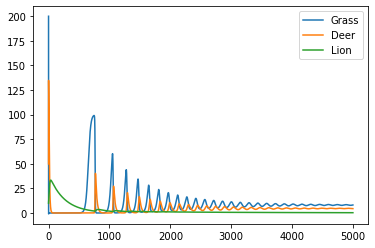

In [319]:
G0 = 200
D0 = 50
L0 = 10

natural_growth = 0.5
death_hunted = 1.5

alpha = natural_growth         # growth rate of grass
beta = 0.1                          # 
k = 100                            # max value
gamma = natural_growth / 10         # growth rate of deer by grazing grass
delta = 0.4                        # death rate of deer
epsilon = 0.02                      # death rate of deer by being hunted by lion
mu = 0.04                           # 
eta = natural_growth / 64          #

t, G, D, L = discrete(G0, D0, L0, alpha, beta, k, gamma, delta, epsilon, eta, mu, t=0, delta_t=0.1, max_iter=5000)

plt.plot(t, G, label='Grass')
plt.plot(t, D, label='Deer')
plt.plot(t, L, label='Lion')
plt.legend()


## Part 2

In [320]:
# natural_growth = 0.5
# death_hunted = 1.5

# alpha = natural_growth         # growth rate of grass
# beta = 0.1                          # 
# k = 100                            # max value
# gamma = natural_growth / 10         # growth rate of deer by grazing grass
# delta = 0.4                        # death rate of deer
# epsilon = 0.02                      # death rate of deer by being hunted by lion
# mu = 0.04                           # 
# eta = natural_growth / 64

# Dt = 0.01
# timestep = 50
# t = np.linspace(1, Dt, timestep)

# x = np.zeros(shape=len(t))
# x[0] = 0.1

# for i in range(1, len(t) - 1):
#     x[i+1] = x[i] + (alpha * x[t] * (1 - x[t] / k) - beta * x[t] * 1) * Dt


## Part 3 - Continous time analysis


In [321]:
dGdt = lambda alpha, beta, k, G, D: (alpha * G * (1 - G/k)) - (beta * G * D)
dDdt = lambda gamma, delta, epsilon, G, D, L: (gamma * G * D) - (delta * D) - (epsilon * D * L)
dLdt = lambda mu, eta, D, L: (-mu * L) + (eta * D * L)

def generate_lotka_volterra(alpha, beta, k, gamma, delta, epsilon, mu, eta):
    ddt = lambda t, x: np.array([
        dGdt(alpha, beta, k, x[0], x[1]),
        dDdt(gamma, delta, epsilon, x[0], x[1], x[2]),
        dLdt(mu, eta, x[1], x[2]),
    ])

    return ddt


In [322]:
natural_growth = 0.5
death_hunted = 1.5

alpha = natural_growth         # growth rate of grass
beta = 0.1                          # 
k = 100                            # max value
gamma = natural_growth / 10         # growth rate of deer by grazing grass
delta = 0.4                        # death rate of deer
epsilon = 0.02                      # death rate of deer by being hunted by lion
mu = 0.04                           # 
eta = natural_growth / 64          #

x0 = np.array([200, 50, 10])
LV1 = generate_lotka_volterra(alpha, beta, k, gamma, delta, epsilon, mu, eta)

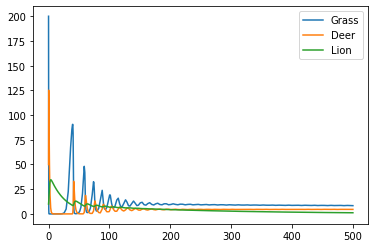

In [323]:
sol = solve_ivp(fun=LV1, y0=x0, t_span=(0, 500), method='RK45')
t = sol.t
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]

plt.plot(t, x, label='Grass')
plt.plot(t, y, label='Deer')
plt.plot(t, z, label='Lion')
plt.legend()

In [324]:
def RK2_next(df, y, t, h, b):
    if b == 0:
        a, alpha, beta = 1, 1, 1
    else:
        a, alpha, beta = 1-b, 1/(2*b), 1/(2*b)
    k1 = df(t, y)
    k2 = df(t+alpha*h, y+beta*k1*h)
    return y + h*(a*k1 + b*k2)



def RK2(df, y0, t0=0, h=0.1, max_iter=5000, b=0.5):
    t = np.zeros(max_iter+1)
    y = np.zeros(shape=(len(y0), max_iter+1))

    t[0], y[:, 0] = t0, y0

    for i in range(max_iter):
        t[i+1] = t[i] + h
        y[:, i+1] = RK2_next(df=df, y=y[:, i], t=t[i], h=h, b=b)
    
    return t, y

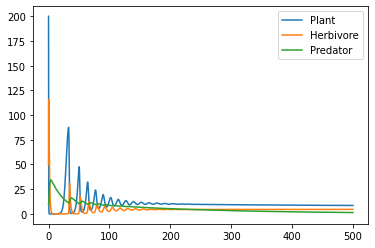

In [325]:
t, sol = RK2(LV1, x0)
x = sol[0]
y = sol[1]
z = sol[2]

plt.plot(t, x, label='Plant')
plt.plot(t, y, label='Herbivore')
plt.plot(t, z, label='Predator')
plt.legend()


### Comparing discrete vs continuous analysis

## Part 4


## Stead state analysis

Starting from dL/dt = 0, we get
$$
\begin{aligned}
& \eta D L - \mu L = 0 \\
& L(\eta D - \mu) = 0 \\
& L = 0 \text{ or } D = \frac{\mu}{\eta} \\
\end{aligned}
$$

Similarly, starting from dD/dt = 0, we get

$$
\begin{aligned}
& \gamma G D - \delta D - \epsilon D L = 0 \\
& D(\gamma G - \delta - \epsilon L) = 0 \\
& D = 0 \text{ or } G = \frac{\delta + \epsilon L}{\gamma} \\
\end{aligned}
$$

Finally, starting from dG/dt = 0, we get

$$
\begin{aligned}
& \alpha G (1 - \frac{G}{k}) - \beta G D = 0 \\
& G(\alpha (1 - \frac{G}{k}) - \beta D) = 0 \\
& G = 0 \text{ or } D = \frac{\alpha (1 - \frac{G}{k})}{\beta} \\
\end{aligned}
$$

Substituting the value of D from the above equation, we get

$$
\begin{aligned}
& G = 0 \text{ or } G = \frac{\alpha (1 - \frac{G}{k})}{\beta} \\
& G = 0 \text{ or } G = \frac{\alpha k - \beta G}{\beta} \\
& G = 0 \text{ or } G = \frac{\alpha k}{\beta + 1} \\
\end{aligned}
$$

Therefore, the steady state values are

$$
\begin{aligned}
& G = \{0, \frac{\alpha k}{\beta + 1}\} \\
& D = \{0, \frac{\delta + \epsilon L}{\gamma}\} \\
& L = \{0, \frac{\mu}{\eta}\} \\
\end{aligned}

$$

28.888888888888882 4.266666666666667 124.44444444444443


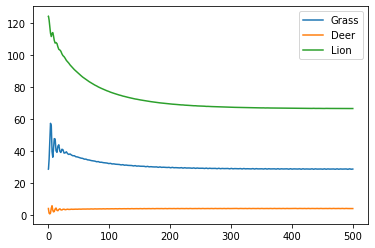

In [326]:
natural_growth = 0.6
death_hunted = 1.5

alpha = natural_growth         # growth rate of grass
beta = 0.1                          # 
k = 100                            # max value
gamma = natural_growth / 10         # growth rate of deer by grazing grass
delta = 0.4                        # death rate of deer
epsilon = 0.02                      # death rate of deer by being hunted by lion
mu = 0.04                           # 
eta = natural_growth / 64          #

x0 = np.array([200, 50, 10])
LV1 = generate_lotka_volterra(alpha, beta, k, gamma, delta, epsilon, mu, eta)


G = ( (alpha - ((beta * mu)/eta)) * k ) / alpha
D = mu/eta
L = ((gamma * ( (((eta*alpha) - (beta*mu)) * k) / ((alpha**2) * eta) )) - delta) / epsilon
x0 = np.array([G, D, L])
print(G, D, L)

sol = solve_ivp(fun=LV1, y0=x0, t_span=(0, 500), method='RK45')
t = sol.t
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]

plt.plot(t, x, label='Grass')
plt.plot(t, y, label='Deer')
plt.plot(t, z, label='Lion')
plt.legend()